# MUTATION RATE OF CLONAL MUTATIONS IN SAMPLES

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
from tqdm.notebook import tqdm
tqdm.pandas()
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [3]:
# Import filtered mutation files 
genome = pd.read_csv('/workspace/datasets/transfer/ferran_to_bet/hg38_mappable_genome.tsv.gz', sep="\t", header=0)

In [4]:
# Import the list of common mutations that are CLONAL in the compendium of the three callers in each tumor. Note that all melanoma mutations are considered clonal!!

mel_clmut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_CCF_Purple_common_mutations.tsv.gz', sep="\t", header=0) #same data as mel_mut_df
sar_clmut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_CCF_Purple_clonal_mutations.tsv.gz', sep="\t", header=0)
lung_clmut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_CCF_Purple_clonal_mutations.tsv.gz', sep="\t", header=0)

In [5]:
genome.head()

,CHR,START,END
0,chr1,54721,54723
1,chr1,54725,54754
2,chr1,66227,66230
3,chr1,66232,66235
4,chr1,66237,66237


In [6]:
# Check object type of columns to operate
genome.dtypes

CHR      object
START     int64
END       int64
dtype: object

In [7]:
# Try the code first with less rows
prova = genome[0:5]
prova

prova['diff'] = prova.apply(lambda row: row['END'] - row['START'], axis=1) # calculate the mappable length per region and create new column
suma = prova['diff'].sum() # sum all the mappable regions to obtain the mappable region
suma

/tmp/jobs/efiguerola/9368478/ipykernel_48220/2353978974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prova['diff'] = prova.apply(lambda row: row['END'] - row['START'], axis=1) # calculate the mappable length per region and create new column


37

In [8]:
# Now apply it to actual code to obtain the number of bases of the mappable hg38 genome
genome['diff'] = genome.progress_apply(lambda row: row['END'] - row['START'], axis=1)
mappable = genome['diff'].sum() 
mappable

  0%|          | 0/14626864 [00:00<?, ?it/s]

2516670238

In [9]:
# Calculate the mappable region
mappable = mappable / 1000000 # convert to bases to Mb
mappable

2516.670238

In [10]:
# Extract the number of clonal mutations from each sample
mel_clmut = mel_clmut_df['mut'].tolist()
sar_clmut = sar_clmut_df['mut'].tolist()
lung_clmut = lung_clmut_df['mut'].tolist()

mel_clmut = len(mel_clmut)
sar_clmut = len(sar_clmut)
lung_clmut = len(lung_clmut)

In [11]:
print(mel_clmut, sar_clmut, lung_clmut)

1062273 19595 19501


In [12]:
# Calculate the clonal mutation rate of each sample
mel_mut_rate = mel_clmut / mappable
sar_mut_rate = sar_clmut / mappable
lung_mut_rate = lung_clmut / mappable

print(mel_mut_rate,sar_mut_rate,lung_mut_rate)

422.0946328050469 7.786081666214705 7.748730725840927


In [13]:
from decimal import Decimal
import decimal
mel_mut_rate = round(Decimal(mel_mut_rate), 4)
sar_mut_rate = round(Decimal(sar_mut_rate), 4)
lung_mut_rate = round(Decimal(lung_mut_rate), 4)
print(mel_mut_rate,sar_mut_rate,lung_mut_rate)

422.0946 7.7861 7.7487


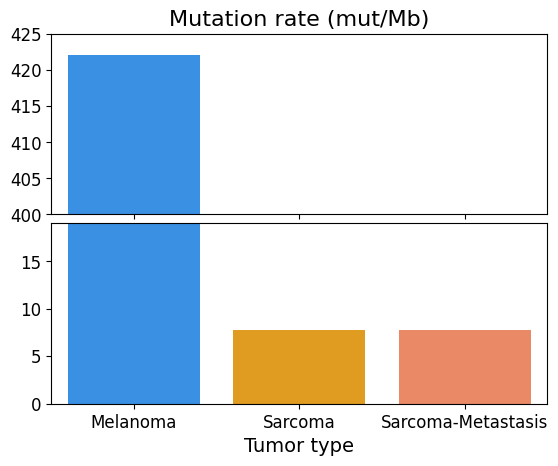

In [14]:
# Representation in one single bar plot graph
# Make a dataframe to represent data
mut_ratio = ({
    'Tumor type':['Melanoma', 'Sarcoma', 'Sarcoma-Metastasis'],
    'Mutation rate': [mel_mut_rate, sar_mut_rate, lung_mut_rate]
})

# Create two subplots to divide y-axis
f, (ax, ay) = plt.subplots(ncols=1, nrows=2, sharey=False)
ax = sns.barplot(x='Tumor type', y='Mutation rate', hue='Mutation rate', data=mut_ratio, palette=['coral', 'orange', 'dodgerblue'],ax=ax)
ay = sns.barplot(x='Tumor type', y='Mutation rate', hue='Mutation rate', data=mut_ratio, palette=['coral', 'orange', 'dodgerblue'],ax=ay)

ax.set_ylim(400, 425)
ay.set_ylim(0,19)  

# Hide legend
ax.legend([],[], frameon=False)
ay.legend([],[], frameon=False)

# Hide
ax.set(xlabel=None)
ay.set(ylabel=None)

ax.tick_params(labelsize=12)
ay.tick_params(labelsize=12)
ay.set_xlabel('Tumor type',fontsize=14)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.axes.set_title("Mutation rate (mut/Mb)",fontsize=16)

# Show the plot
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

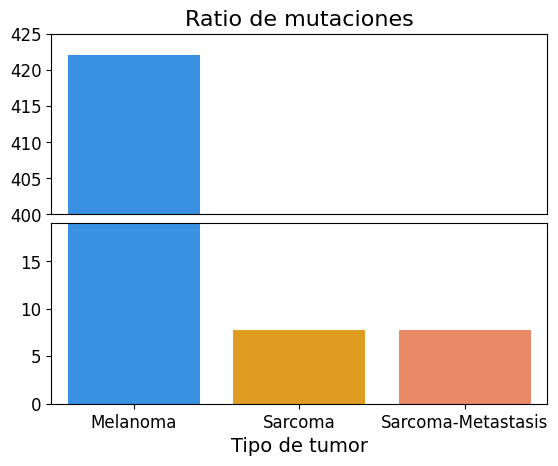

In [15]:
# Representation in one single bar plot graph
# Make a dataframe to represent data
mut_ratio = ({
    'Tipo de tumor':['Melanoma', 'Sarcoma', 'Sarcoma-Metastasis'],
    'Ratio de mutaciones': [mel_mut_rate, sar_mut_rate, lung_mut_rate]
})

# Create two subplots to divide y-axis
f, (ax, ay) = plt.subplots(ncols=1, nrows=2, sharey=False)
ax = sns.barplot(x='Tipo de tumor', y='Ratio de mutaciones', hue='Ratio de mutaciones', data=mut_ratio, palette=['coral', 'orange', 'dodgerblue'],ax=ax) #above graph
ay = sns.barplot(x='Tipo de tumor', y='Ratio de mutaciones', hue='Ratio de mutaciones', data=mut_ratio, palette=['coral', 'orange', 'dodgerblue'],ax=ay) #below graph

ax.set_ylim(400, 425)
ay.set_ylim(0,19)  

# Hide legend
ax.legend([],[], frameon=False)
ay.legend([],[], frameon=False)

# Hide elements in graphs
ax.set(xlabel=None)
ay.set(ylabel=None)
ax.tick_params(labelsize=12)
ay.tick_params(labelsize=12)
ay.set_xlabel('Tipo de tumor',fontsize=14)
ax.set_xticks([])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.axes.set_title("Ratio de mutaciones",fontsize=16)

# Show the plot
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Save figure first then show
plt.savefig('/workspace/projects/sjd_melos/exports_images/ratio_mutaciones.png',dpi=300,transparent=True, format='png')

plt.show()

## Mutation rate of coding regions